# MH4510 - Statistical Learning and Data Mining Project
## Facial Recognition

In [1]:
import os
#os.chdir(r'C:\Users\NTU user\Desktop\MAEC\Year 3\MH4510 Data Mining\MH4510 Face Recognition')
os.chdir(r'/Users/alson/Downloads/MH4510 Face Recognition-2/')

from full import *
from extract_face_v2 import *

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
#import opencv
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from matplotlib.pyplot import imshow
from PIL import Image
import collections
from keras.models import load_model
import timeit

print("packages imported")

packages imported


Using TensorFlow backend.


### Train-test dataset preparation
First, we prepare our train and test datasets. We also load the pre-loaded model.

In [2]:
#%% Predefined things

start_time = timeit.default_timer()
# code you want to evaluate
gpu_memory_fraction = 1.0
minsize = 50 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor
FRmodel = faceRecoModel(input_shape=(3, 96, 96))
FRmodel = load_model('face-rec_Google.h5')
#%%
name = 'th'
#image_dir_raw = r'images_raw'+'//'+name
#image_dir_rotated = r'images_rotated' +'\\' + name
#image_dir_bounded= r'images_bounded' +'\\' + name
image_dir_raw = r'images_raw'+'/'+name
image_dir_rotated = r'images_rotated' +'/' + name
image_dir_bounded= r'images_bounded' +'/' + name



elapsed = timeit.default_timer() - start_time
print("weights loaded")
print(elapsed)

weights loaded
16.658365017996402


/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
name_dict=dict()

name_dict[1] = 'alson'
name_dict[2] = 'th'
name_dict[3] = 'hy'
#name_dict[4] = 'wf'
#name_dict[5] = 'jace'
#name_dict[6] = 'kelly'
name_dict[99] = 'unable to identify'
print("dictionary loaded")

dictionary loaded


In [4]:
#%%

#rotate_images(image_dir_raw, image_dir_rotated)
#print(os.listdir(image_dir))
#%%
#import cv2
bounding_boxes_compiled = get_bounding_box_coord(image_dir_rotated)

#%%
bounding(image_dir_rotated, image_dir_bounded, bounding_boxes_compiled, name)

#%%
encoded_array = encode_img(image_dir_bounded, FRmodel, 0)

Creating networks and loading parameters


In [5]:
def full_stack(name, label):
    #image_dir_raw = r'images_raw'+'//'+name
    #image_dir_rotated = r'images_rotated' +'\\' + name
    #image_dir_bounded= r'images_bounded' +'\\' + name
    image_dir_raw = r'images_raw'+'/'+name
    image_dir_rotated = r'images_rotated' +'/' + name
    image_dir_bounded= r'images_bounded' +'/' + name
    #rotate_images(image_dir_raw, image_dir_rotated)
    #bounding_boxes_compiled = get_bounding_box_coord(image_dir_rotated)
    #bounding(image_dir_rotated, image_dir_bounded, bounding_boxes_compiled, name)
    encoded_array = encode_img(image_dir_bounded, FRmodel, label)
    
    return encoded_array

In [6]:
#%%
encoded_array_alson = full_stack('alson',1)
encoded_array_th = full_stack('th', 2)
encoded_array_hy = full_stack('hy', 3)
#encoded_array_wf = full_stack('wf',4)
#encoded_array_jace = full_stack('jace', 5)
#encoded_array_kelly = full_stack('kelly', 6)
#%%
encoded_array_test = full_stack('test',99)
test = encoded_array_test[:,:-1]

In [7]:
test_answer = np.array([os.listdir('images_bounded/test')]).T

#%%
train = encoded_array_alson
train = np.vstack([train, encoded_array_th])
train = np.vstack([train, encoded_array_hy])
#train = np.vstack([train, encoded_array_wf])
#train = np.vstack([train, encoded_array_jace])
#train = np.vstack([train, encoded_array_kelly])

#%%
np.save('train_set_v5', train)
np.save('test_set_v5', test)

So, we have our train and test datasets now. Next we proceed to filter the images to detect our faces.

In [8]:
database = {}
#img_dir = "images_bounded"+"\\" +"database"+ "\\"
img_dir = "images_bounded" + "/" + "database" + "/"
database["3_Hwee Young_1"] = img_to_encoding(img_dir + "hy_bounded0.jpg", FRmodel)
database["3_Hwee Young_2"] = img_to_encoding(img_dir + "hy_bounded1.jpg", FRmodel)
database["3_Hwee Young_3"] = img_to_encoding(img_dir + "hy_bounded2.jpg", FRmodel)
database["3_Hwee Young_4"] = img_to_encoding(img_dir + "hy_bounded3.jpg", FRmodel)
database["3_Hwee Young_5"] = img_to_encoding(img_dir + "hy_bounded4.jpg", FRmodel)

database["2_Tze Hong_1"] = img_to_encoding(img_dir + "th_bounded0.jpg", FRmodel)
database["2_Tze Hong_2"] = img_to_encoding(img_dir + "th_bounded1.jpg", FRmodel)
database["2_Tze Hong_3"] = img_to_encoding(img_dir + "th_bounded2.jpg", FRmodel)
database["2_Tze Hong_4"] = img_to_encoding(img_dir + "th_bounded3.jpg", FRmodel)
database["2_Tze Hong_5"] = img_to_encoding(img_dir + "th_bounded4.jpg", FRmodel)

database["1_Alson_1"] = img_to_encoding(img_dir + "alson_bounded0.jpg", FRmodel)
database["1_Alson_2"] = img_to_encoding(img_dir + "alson_bounded1.jpg", FRmodel)
database["1_Alson_3"] = img_to_encoding(img_dir + "alson_bounded2.jpg", FRmodel)
database["1_Alson_4"] = img_to_encoding(img_dir + "alson_bounded3.jpg", FRmodel)
database["1_Alson_5"] = img_to_encoding(img_dir + "alson_bounded4.jpg", FRmodel)

'''
database["5_Jace_1"] = img_to_encoding(img_dir + "jace_bounded0.jpg", FRmodel)
database["5_Jace_2"] = img_to_encoding(img_dir + "jace_bounded1.jpg", FRmodel)
database["5_Jace_3"] = img_to_encoding(img_dir + "jace_bounded2.jpg", FRmodel)
database["5_Jace_4"] = img_to_encoding(img_dir + "jace_bounded3.jpg", FRmodel)
database["5_Jace_5"] = img_to_encoding(img_dir + "jace_bounded4.jpg", FRmodel)
'''

print("database loaded")

'\ndatabase["5_Jace_1"] = img_to_encoding(img_dir + "jace_bounded0.jpg", FRmodel)\ndatabase["5_Jace_2"] = img_to_encoding(img_dir + "jace_bounded1.jpg", FRmodel)\ndatabase["5_Jace_3"] = img_to_encoding(img_dir + "jace_bounded2.jpg", FRmodel)\ndatabase["5_Jace_4"] = img_to_encoding(img_dir + "jace_bounded3.jpg", FRmodel)\ndatabase["5_Jace_5"] = img_to_encoding(img_dir + "jace_bounded4.jpg", FRmodel)\n'

In [9]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the happy house by finding who is the person on the image_path image.
    
    Arguments:
    image_path -- path to an image
    database -- database containing image encodings along with the name of the person on the image
    model -- your Inception model instance in Keras
    
    Returns:
    min_dist -- the minimum distance between image_path encoding and the encodings from the database
    identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE ### 

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding = img_to_encoding(image_path, model)

    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)
        dist = np.linalg.norm(encoding-db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            identity = name

    ### END CODE HERE ###
    
    if min_dist > 0.045:
        print("Not in the database." +'...'+', the distance is '+str(min_dist) +'...'+image_path)
        return False, identity, min_dist, encoding
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist) +'...'+image_path)
        return True, identity, min_dist, encoding

In [10]:
#img_dir = "images_bounded"+"\\" +"test"+ "\\"
img_dir = "images_bounded"+"/" +"test"+ "/"
images = os.listdir(img_dir)
for i in images:
    who_is_it(img_dir + i, database, FRmodel)

it's 3_Hwee Young_1, the distance is 0.034381956...images_bounded/test/hy1.jpg
it's 1_Alson_2, the distance is 0.039687414...images_bounded/test/a1.jpg
it's 1_Alson_2, the distance is 0.043278016...images_bounded/test/a3.jpg
it's 3_Hwee Young_1, the distance is 0.033293147...images_bounded/test/hy2.jpg
it's 3_Hwee Young_1, the distance is 0.037531532...images_bounded/test/hy3.jpg
it's 1_Alson_2, the distance is 0.04443448...images_bounded/test/a2.jpg
it's 1_Alson_3, the distance is 0.04199431...images_bounded/test/a5.jpg
it's 3_Hwee Young_1, the distance is 0.034296326...images_bounded/test/hy4.jpg
it's 3_Hwee Young_5, the distance is 0.032635316...images_bounded/test/hy5.jpg
it's 1_Alson_2, the distance is 0.04418828...images_bounded/test/a4.jpg
Not in the database...., the distance is 0.05247798...images_bounded/test/k1.jpg
Not in the database...., the distance is 0.049345538...images_bounded/test/k3.jpg
Not in the database...., the distance is 0.046895195...images_bounded/test/k2.jp

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
#import numpy as np
#%%
train = np.load('train_set_v5.npy')
test = np.load('test_set_v5.npy')
X = train[:,:-1]
Y = train[:,128]
#%%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10, stratify=Y)

#%%

model_lr = LogisticRegressionCV(cv = 10, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
model_rf = RandomForestClassifier(n_estimators=1000, criterion ='gini', max_features = 'sqrt', bootstrap  = True, oob_score  = True)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [12]:
#%%
#img_dir = "images_bounded"+"\\" +"test"+ "\\"
img_dir = "images_bounded"+"/" +"test"+ "/"
images = os.listdir(img_dir)

final = np.empty([0,5])

N = len(images)
for i in range(N):
    final_row = np.array([])
    check, identity_filterlayer, min_dist, encoding = who_is_it(img_dir + images[i], database, FRmodel)
    identity_filterlayer = int(identity_filterlayer[0])
    #identity_filterlayer = name_dict[identity_filterlayer]
    final_row = np.append(final_row, check)
    final_row = np.append(final_row, identity_filterlayer)
    
    if check == True:
        final_row = np.append(final_row, model_lr.predict(encoding))
        final_row = np.append(final_row, model_rf.predict(encoding))
        final_row = np.append(final_row, 0)
    
    else:
        final_row = np.append(final_row, 99)
        final_row = np.append(final_row, 99)
        final_row = np.append(final_row, 0)
        
    final = np.vstack([final, final_row])

num_results = final.shape[0]
#%%
for i in range(num_results):
    voting_check = np.unique(final[i][1:4], return_counts= True)
    voting_idx = np.argmax(voting_check[1])
    final[i][4] = voting_check[0][voting_idx]
    
#%%
final_namelist=np.array([name_dict[i] for i in list(final[:,4])])
final_namelist

it's 3_Hwee Young_1, the distance is 0.034381956...images_bounded/test/hy1.jpg
it's 1_Alson_2, the distance is 0.039687414...images_bounded/test/a1.jpg
it's 1_Alson_2, the distance is 0.043278016...images_bounded/test/a3.jpg
it's 3_Hwee Young_1, the distance is 0.033293147...images_bounded/test/hy2.jpg
it's 3_Hwee Young_1, the distance is 0.037531532...images_bounded/test/hy3.jpg
it's 1_Alson_2, the distance is 0.04443448...images_bounded/test/a2.jpg
it's 1_Alson_3, the distance is 0.04199431...images_bounded/test/a5.jpg
it's 3_Hwee Young_1, the distance is 0.034296326...images_bounded/test/hy4.jpg
it's 3_Hwee Young_5, the distance is 0.032635316...images_bounded/test/hy5.jpg
it's 1_Alson_2, the distance is 0.04418828...images_bounded/test/a4.jpg
Not in the database...., the distance is 0.05247798...images_bounded/test/k1.jpg
Not in the database...., the distance is 0.049345538...images_bounded/test/k3.jpg
Not in the database...., the distance is 0.046895195...images_bounded/test/k2.jp

array(['hy', 'alson', 'alson', 'hy', 'hy', 'alson', 'alson', 'hy', 'hy',
       'alson', 'unable to identify', 'unable to identify',
       'unable to identify', 'unable to identify', 'unable to identify',
       'th', 'th', 'th', 'th', 'th'], dtype='<U18')

In [13]:
#print(final_namelist[0])
#final_namelist.size
#np.ptp(final_namelist,1)
#for i in np.ptp(final_namelist, axis=1):
N=len(final_namelist)
for i in range(N):
    print("images "+ str(i) + " is " +final_namelist[i])

images 0 is hy
images 1 is alson
images 2 is alson
images 3 is hy
images 4 is hy
images 5 is alson
images 6 is alson
images 7 is hy
images 8 is hy
images 9 is alson
images 10 is unable to identify
images 11 is unable to identify
images 12 is unable to identify
images 13 is unable to identify
images 14 is unable to identify
images 15 is th
images 16 is th
images 17 is th
images 18 is th
images 19 is th


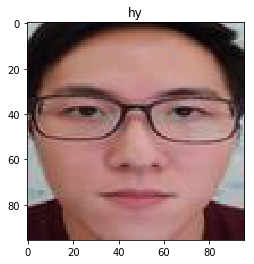

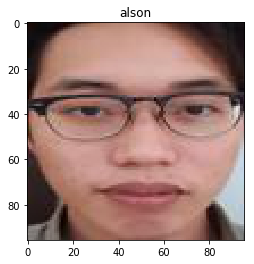

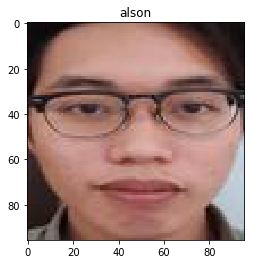

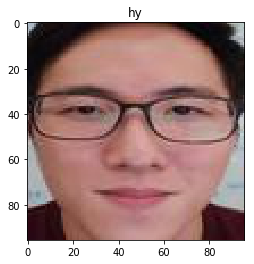

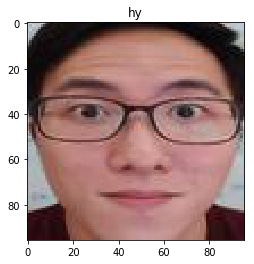

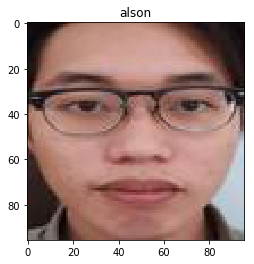

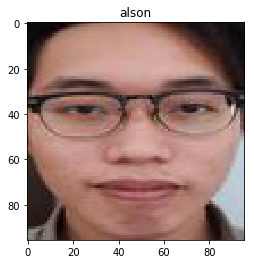

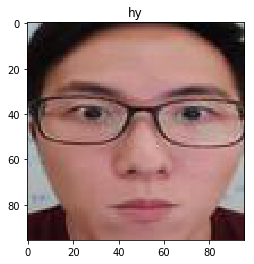

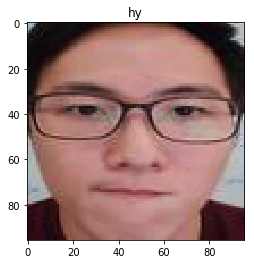

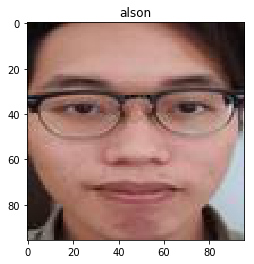

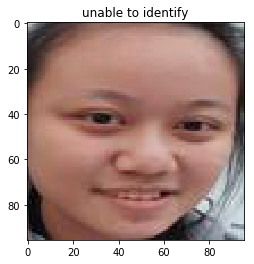

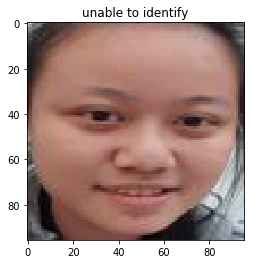

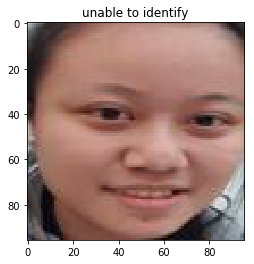

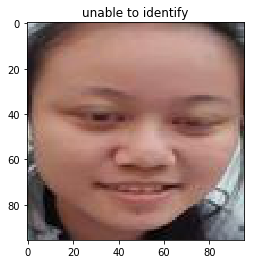

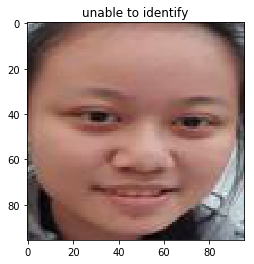

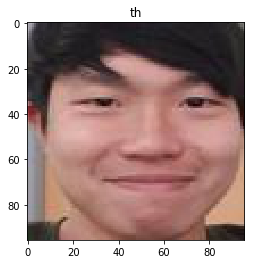

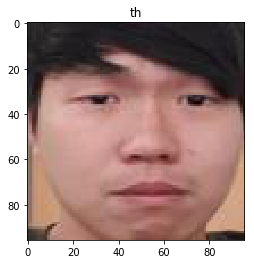

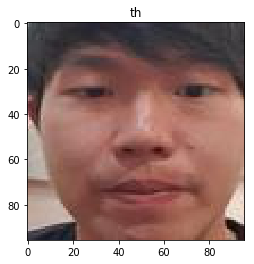

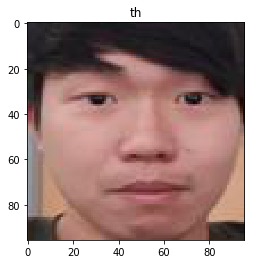

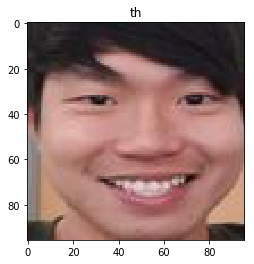

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
N=len(images)
for i in range(N):
    img=mpimg.imread(img_dir+images[i])
    imgplot = plt.imshow(img)
    plt.title(final_namelist[i])
    plt.show()